In [141]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel gradio pingouin

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
# Carregar o dataset
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

## Preparo do Dataset

In [143]:
#Checar aqrquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [144]:
# Remover coluna id
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [145]:
#Checar aqrquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Grupo Sanguíneo     996 non-null    object 
 1   Fumante             997 non-null    object 
 2   Nível de Atividade  996 non-null    object 
 3   Idade               997 non-null    float64
 4   Peso                997 non-null    float64
 5   Altura              997 non-null    float64
 6   Colesterol          1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [146]:
# Renomear as Colunas para facilitar a manipulação
df_colesterol.columns = ['grupo_sanguineo', 'fumante','nivel_atividade_fisica','idade','peso','altura','nivel_colesterol']

In [147]:
#Checar aqrquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         996 non-null    object 
 1   fumante                 997 non-null    object 
 2   nivel_atividade_fisica  996 non-null    object 
 3   idade                   997 non-null    float64
 4   peso                    997 non-null    float64
 5   altura                  997 non-null    float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [148]:
# Copiar df para df eda
df_colesterol_eda = df_colesterol.copy()

In [149]:
# Copiar df para df bucketing
df_colesterol_bucketing = df_colesterol.copy()

## EDA

In [150]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


Temos 3 colunas categoricas e o resto numéricas, sendo nossa variável dependente é numérica.

In [151]:
print(df_colesterol_eda.grupo_sanguineo.unique())
print(df_colesterol_eda.fumante.unique())
print(df_colesterol_eda.nivel_atividade_fisica.unique())

['B' 'A' 'O' 'AB' nan]
['Sim' 'Não' nan]
['Baixo' 'Moderado' 'Alto' nan]


Checando os valores possíveis das variáveis categoricas, podemos ver que temos valores nulos

In [152]:
# Detectar Valores Ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [153]:
# Medidas estatísticas do dataframe
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


Estou olhando como tratar os valores ausentes, para isso tenho que decidir se vou usar média, ou mediana nos dados. Para idade podemos usar a mediana visto que está proximo da média e não vai sofrer se tivermos outliers. Ja a peso pode ter algum erro por que a idade minima é 20 e o peso minimo é 15 o que não faz sentido, por isso vou usar a mediana. A altura podemos usar a mediana por estar próximo e um numero inteiro. 

Já os casos das variáveis categorias podemos utilizar a moda para pegar as que tem mais ocorrencia.

In [154]:
# Coletar medidas das variaveis categoricas escolhidas como comentado acima.
moda_grupo_sanguineo = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade_fisica = df_colesterol_eda.nivel_atividade_fisica.mode()

In [155]:
# Coletar medidas das variaveis numericas escolhidas como comentado acima.
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [156]:
# Inputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sanguineo[0], 'fumante': moda_fumante[0], 'nivel_atividade_fisica': moda_nivel_atividade_fisica[0], 'idade': mediana_idade, 'peso': mediana_peso, 'altura': mediana_altura}, inplace=True)

In [157]:
# Detectar Valores Ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [158]:
# Converter idade e altura para inteiro
df_colesterol_eda['idade'] = df_colesterol_eda['idade'].astype(int)
df_colesterol_eda['altura'] = df_colesterol_eda['altura'].astype(int)

In [159]:
# Estrutura do dataframe
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [160]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


Dataframe agora está com os tipos corretos e valores ausentes corrigidos.

<Axes: xlabel='idade'>

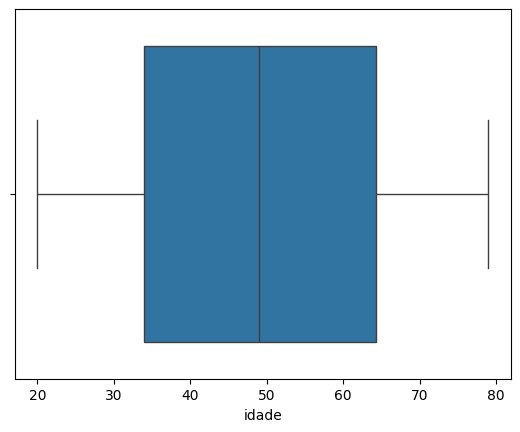

In [161]:
# Verificar / detectar outliers
sns.boxplot(x='idade', data=df_colesterol_eda)

Notamos que não temos outliers e os valores no dataset fazem sentido

<Axes: xlabel='peso'>

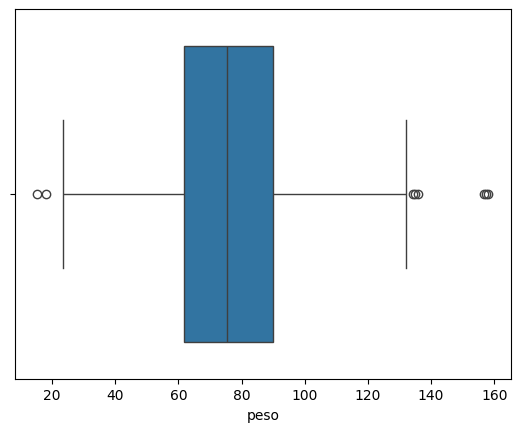

In [162]:
# Verificar / detectar outliers
sns.boxplot(x='peso', data=df_colesterol_eda)

Notamos outliers nos dados do peso, muito mais pra cima do que abaixo.
Porém, pessoas acima de 130 kilos como mostra no outlier fazem sentido no dataframe por que podem ser pessoas acima do peso buscando exames de colesterol
já pessoas com menos de 20 kilos não faz sentido pela idade.

In [163]:
# Filtrar o publico a ser removido
df_colesterol_eda[(df_colesterol_eda['peso'] < 40)].peso.count()

37

Vamos remover esses 37 individuos que aparecem no dataframe com menos de 40 kilos para fazer mais sentido.

In [164]:
# Remover publico do dataframe
df_colesterol_eda.drop(df_colesterol_eda[(df_colesterol_eda['peso'] < 40)].index, inplace=True)

In [165]:
#Estrutura do dataframe
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         963 non-null    object 
 1   fumante                 963 non-null    object 
 2   nivel_atividade_fisica  963 non-null    object 
 3   idade                   963 non-null    int64  
 4   peso                    963 non-null    float64
 5   altura                  963 non-null    int64  
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


<Axes: xlabel='altura'>

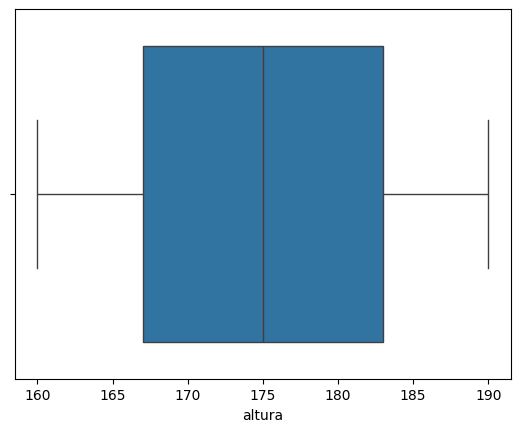

In [166]:
# Verificar / detectar outliers
sns.boxplot(x='altura', data=df_colesterol_eda)

<Axes: xlabel='nivel_colesterol'>

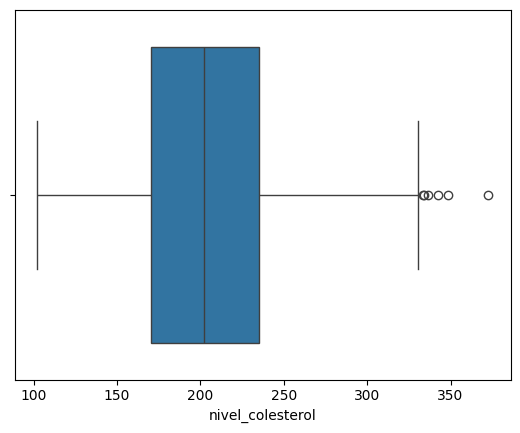

In [167]:
# Verificar / detectar outliers
sns.boxplot(x='nivel_colesterol', data=df_colesterol_eda)

Podemos ver valores extremos na parte de cima para o colesterol, porém faz sentido visto que é um exame de colesterol total (bom + ruim)

### Analise Gráfica

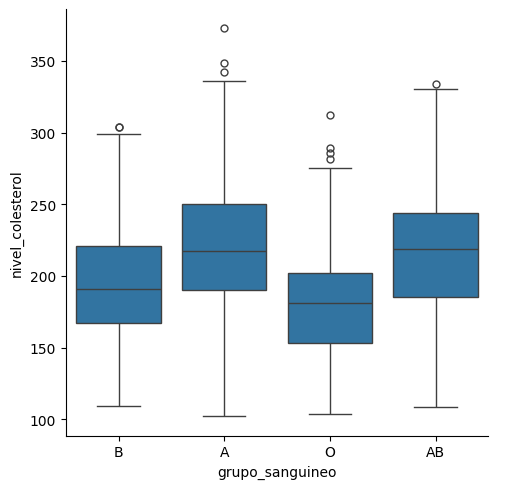

In [168]:
# Cruzamento de variaveis categorias com o nivel de colesterol
sns.catplot(x='grupo_sanguineo', y='nivel_colesterol', kind='box', data=df_colesterol_eda)

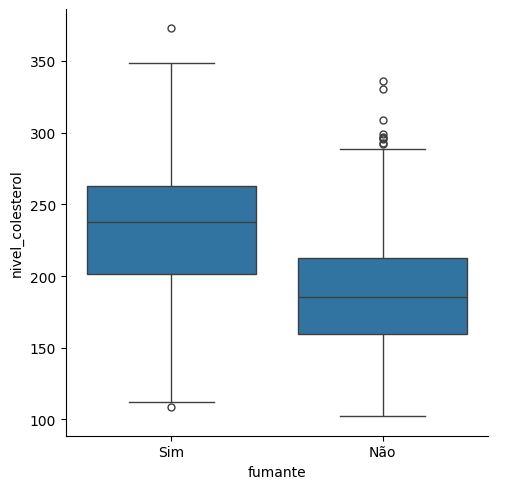

In [169]:
# Cruzamento de variaveis categorias com o nivel de colesterol
sns.catplot(x='fumante', y='nivel_colesterol', kind='box', data=df_colesterol_eda)

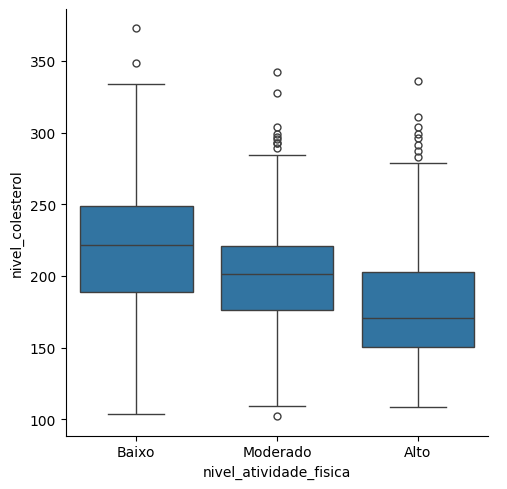

In [170]:
# Cruzamento de variaveis categorias com o nivel de colesterol
sns.catplot(x='nivel_atividade_fisica', y='nivel_colesterol', kind='box', data=df_colesterol_eda)

Analisando o cruzamento de variaveis podemos ver que existe uma certa influencia, fumantes, e grupo sanguineo aparentam ter um colesterol maior. O mesmo para atividade fisica porem inversamente influente

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

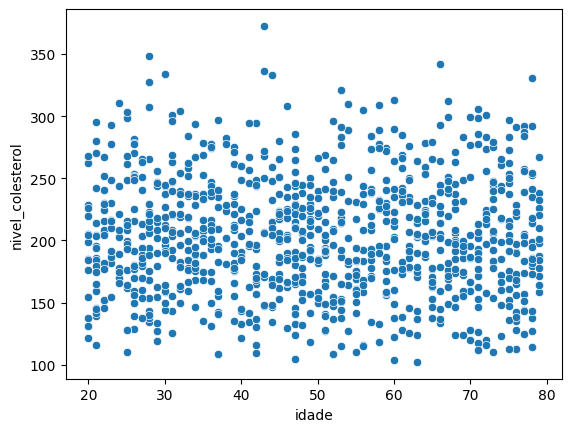

In [171]:
# Cruzamento de variaveis numericas com o nivel de colesterol isoladas
sns.scatterplot(x='idade', y='nivel_colesterol', data=df_colesterol_eda)

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

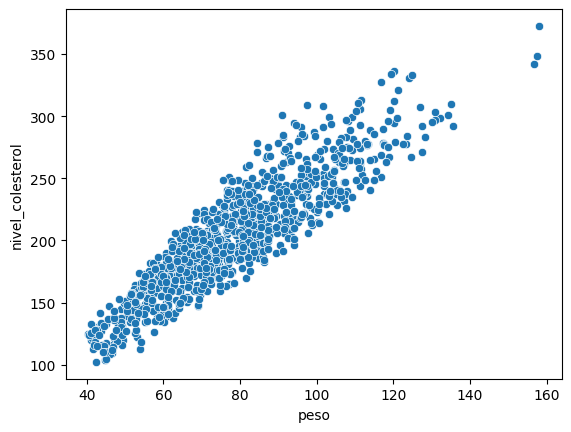

In [172]:
# Cruzamento de variaveis numericas com o nivel de colesterol isoladas
sns.scatterplot(x='peso', y='nivel_colesterol', data=df_colesterol_eda)

Podemos notar que ao isolar o peso com o nivel colesterol temos uma tendencia de alta, note tambem os outliers 

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

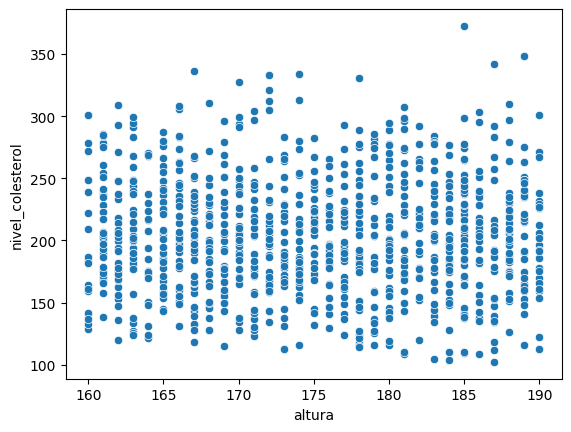

In [173]:
# Cruzamento de variaveis numericas com o nivel de colesterol isoladas
sns.scatterplot(x='altura', y='nivel_colesterol', data=df_colesterol_eda)

### Histogramas

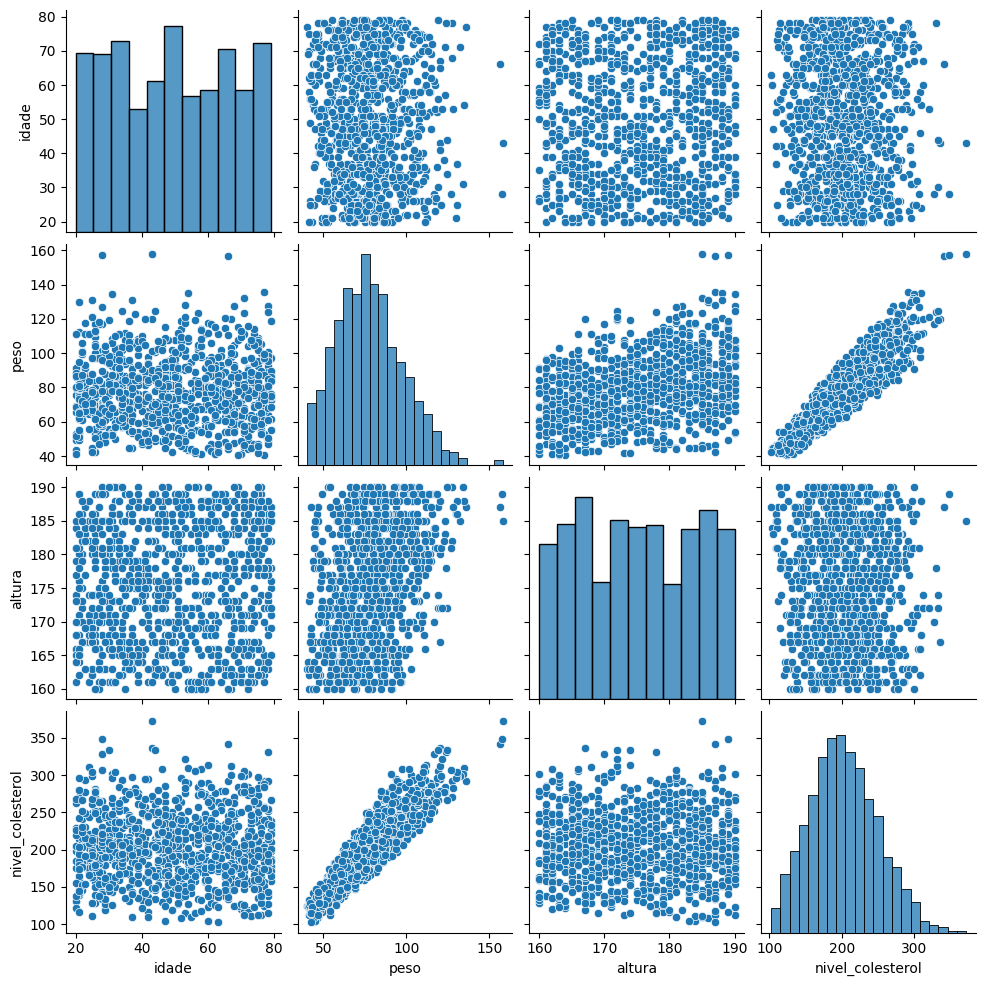

In [174]:
# Cruzamento de variaveis numericas com o nivel de colesterol geral
sns.pairplot(df_colesterol_eda)

In [175]:
# Converter variáveis categorias nominais em numericas para facilitar a manipulação, usando o método de codificação One-Hot Encoding do Pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [176]:
# Checando dados após a conversão
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [177]:
# Vamos converter a váriavel categorica ordinal (nivel_atividade_fisica) em numericar usando o factorize do Pandas
df_colesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_colesterol_eda['nivel_atividade_fisica'])[0] + 1

In [178]:
# Checando dados após a conversão
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
5,1,68,66.8,170,185.31,0,0,1,0,1,0
6,1,60,117.3,181,289.33,1,0,0,0,0,1
7,2,35,86.9,174,216.48,0,0,0,1,0,1
8,1,62,81.3,166,235.30,0,0,0,1,1,0
10,1,57,123.6,183,283.87,1,0,0,0,0,1


<Axes: >

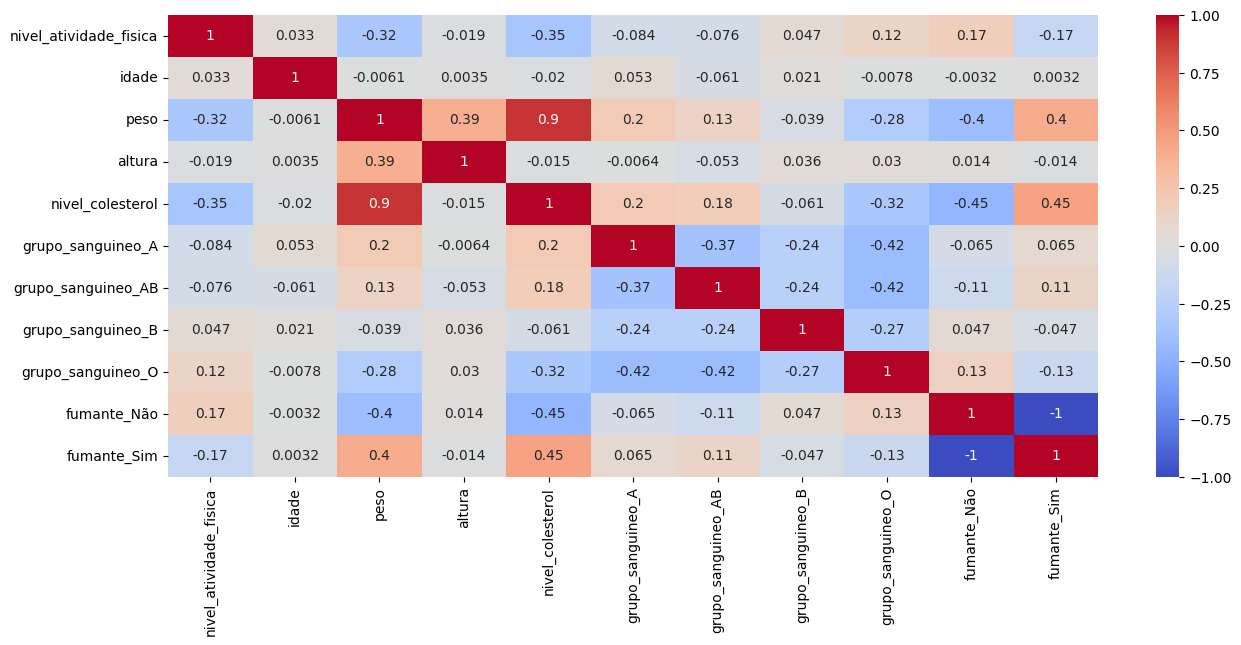

In [179]:
# Mapa de calor com correlação entre as variáveis
plt.figure(figsize=(15, 6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

<Axes: >

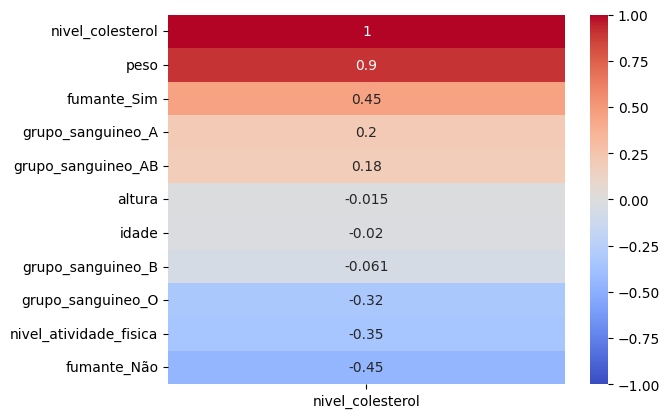

In [180]:
# Formato de Ranking, somente correlação com a variavel target (nivel_colesterol)
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [181]:
# Bucketing (Agrupamento, Categorizar) de variáveis numéricas

bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(df_colesterol_bucketing['idade'], bins=bins_idade, labels=labels_idade, include_lowest=True)

In [182]:
# Checando dados após a conversão
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


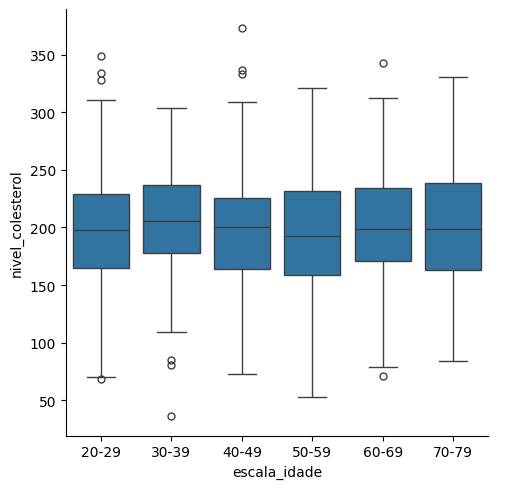

In [183]:
# Fazemos o boxplot para verificar a distribuição do nivel de colesterol por faixa etária
sns.catplot(x='escala_idade', y='nivel_colesterol', kind='box', data=df_colesterol_bucketing)

In [184]:
# Bucketing (Agrupamento, Categorizar) de variáveis numéricas
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_colesterol_bucketing['escala_peso'] = pd.cut(df_colesterol_bucketing['peso'], bins=bins_peso, labels=labels_peso, include_lowest=True)

<Axes: xlabel='escala_peso', ylabel='nivel_colesterol'>

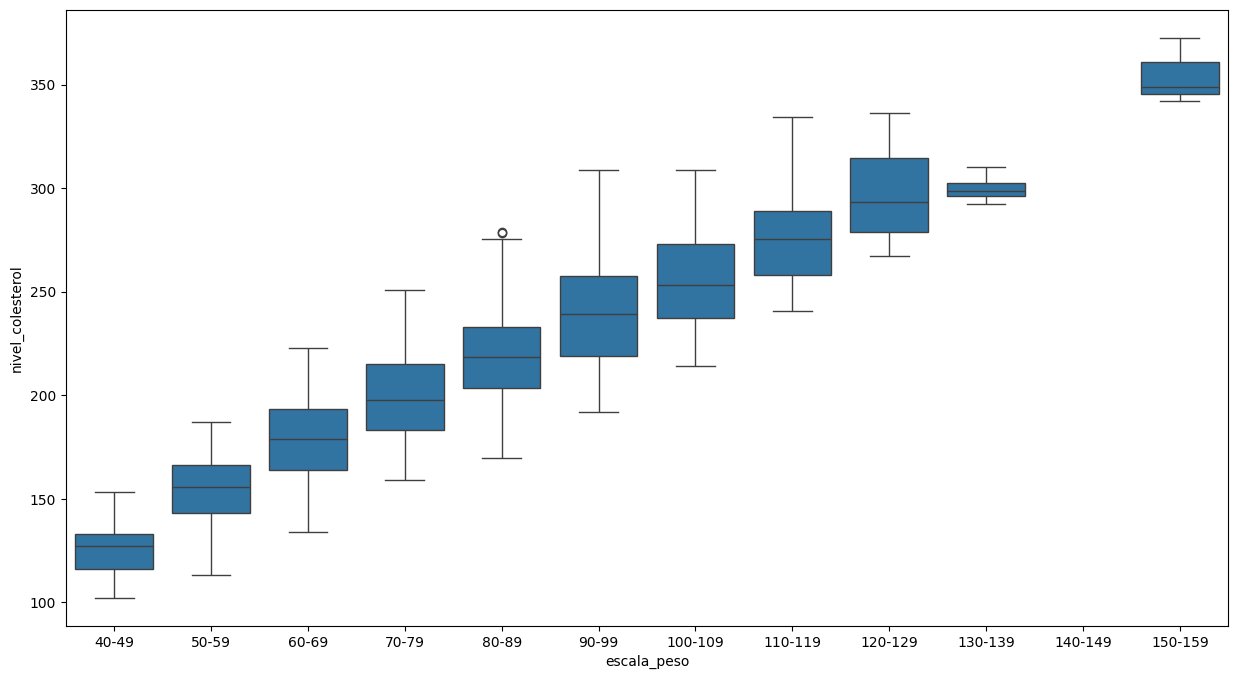

In [185]:
# Fazemos o boxplot para verificar a distribuição do nivel de colesterol por agrupamento de peso
plt.figure(figsize=(15, 8))
sns.boxplot(x='escala_peso', y='nivel_colesterol', data=df_colesterol_bucketing)

## Preparação Para Treinamento

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [187]:
# Vamos remover igual fizemos no dataframe de eda os valores de peso menores que 40
df_colesterol.drop(df_colesterol[(df_colesterol['peso'] < 40)].index, inplace=True, axis=0)

In [188]:
# Checando dados após a remoção
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [189]:
# Dividir o dataframe em variáveis independentes (X) e dependentes (y)
X = df_colesterol.drop(columns=['nivel_colesterol'], axis=1)
y = df_colesterol['nivel_colesterol']

In [190]:
# Split dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [191]:
# -- Pipeline para pré-processamento dos dados --
# Imputar moda (most_frequent) para variáveis categóricas - grupo_sanguineo, fumante, nivel_atividade_fisica
# Imputar mediana para variáveis numéricas - idade, peso, altura
# Normalizar (padronizar) variáveis numéricas - idade, peso, altura
# Aplicar One-Hot Encoding para variáveis categóricas nominais - grupo_sanguineo, fumante
# Aplicar Ordinal Encoding para variáveis categóricas ordinais - nivel_atividade_fisica

# Nomes das colunas
colunas_categoricas_nominais = ['grupo_sanguineo', 'fumante']
colunas_categoricas_ordinais = ['nivel_atividade_fisica']
colunas_numericas = ['idade', 'peso', 'altura']

In [192]:
# Transformer Categoricas Nominais
transformer_categorias_nominais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [193]:
# Transformer Categoricas Ordinais
transformer_categorias_ordinais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])

In [194]:
# Transformer Numéricas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [195]:
# Criar um column transformer para aplicar os transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', transformer_numericas, colunas_numericas),
    ('cat_nom', transformer_categorias_nominais, colunas_categoricas_nominais),
    ('cat_ord', transformer_categorias_ordinais, colunas_categoricas_ordinais)
])

In [196]:
# Criando o pipeline principal = Pre Processamento + Treinamento do Modelo
model_regr = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

In [197]:
# Treinamento do modelo
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'peso', 'altura']),
                                                 ('cat_nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica'])])),
                ('regressor', LinearRegression())])

## Validação do Modelo

### Análise de Métricas

In [198]:
# Gerar Predições
y_pred = model_regr.predict(X_test)

In [200]:
# Calcular R2 Score com o y de test separado com o y predito
# R2 Score é uma métrica que mede a proporção da variabilidade em Y que é previsível a partir de X
# Ou seja, quanto mais próximo de 1 as variaveis independentes explicam a variavel dependente
# Quanto mais próximo de 1, melhor
r2_score(y_test, y_pred)

0.9594250724093465

In [203]:
# Calcular o MAE (Mean Absolute Error)
# MAE é a média da diferença absoluta entre o valor real e o valor previsto
# Ou seja, quanto menor o valor, melhor
# O numero está em escala do target, miligramas por decilitro no caso.
mean_absolute_error(y_test, y_pred)

7.313838031022508

In [208]:
# Calcular o RMSE (Root Mean Squared Error)
# RMSE é a raiz quadrada da média dos erros ao quadrado
# O RMSE é uma métrica que penaliza erros grandes e é mais sensível a outliers
# Ou seja, quanto menor o valor, melhor
# O numero está em escala do target, miligramas por decilitro de sangue.
root_mean_squared_error(y_test, y_pred)

9.09764924648703

### Análise de Resíduos

In [210]:
# Calcular residuos (erros do modelo)
residuos = y_test - y_pred

In [211]:
# Transformar residuos na escala padrão
# (X - X.mean()) / X.std()
from scipy.stats import zscore
residuos_std = zscore(residuos)

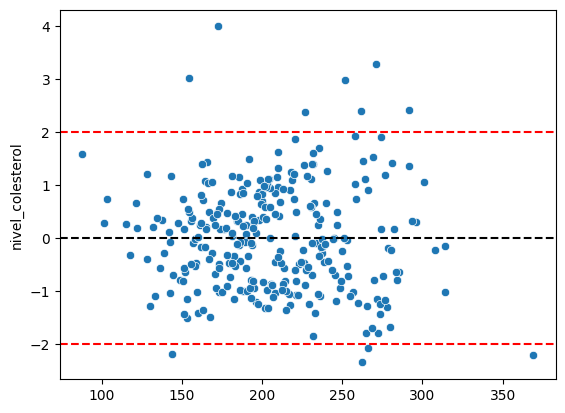

In [215]:
# Verificar linearidade dos residuos: Valores estão entre -2 e 2 (escala padrão)
# Verificar homocedasticidade dos residuos: Valores em torno da reta.
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')
plt.axhline(y=2, color='r', linestyle='--')

Notamos que existem valores fora da linearidade porem muito poucos comparados com os 300 em teste, não notamos também nenhuma tendencia o que é bom

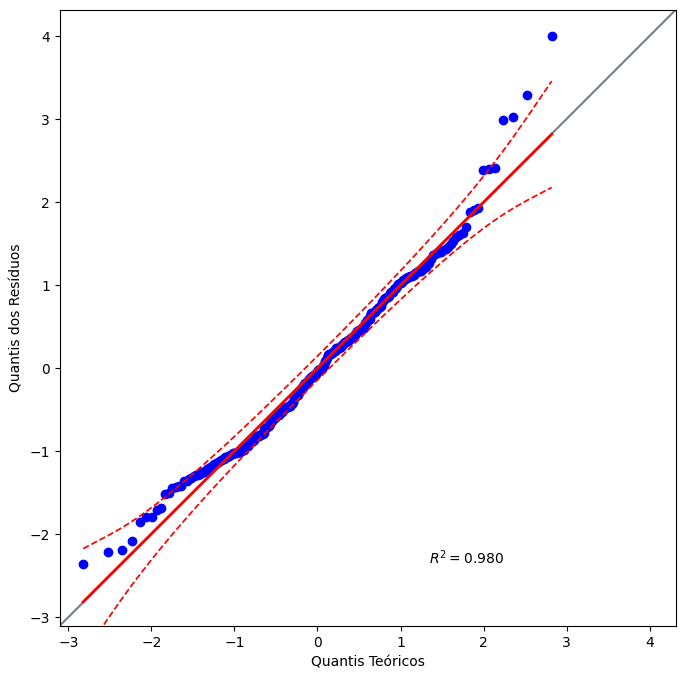

In [219]:
# Checar se resíduos seguem uma distribuição normal
# QQ Plot (Quantile-Quantile Plot)
import pingouin as pg
plt.figure(figsize=(14, 8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Resíduos')
plt.show()

In [224]:
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [225]:
# Teste de Shapiro-Wilk para verificar normalidade dos residuos
# H0: A amostra é normalmente distribuída
# H1: A amostra não é normalmente distribuída
stat, p = shapiro(residuos)
print('Estatística=%.3f, p=%.3f' % (stat, p))

Estatística=0.981, p=0.001


In [229]:
# Teste de Kolmogorov-Smirnov para verificar normalidade dos residuos
stat_ks, p_ks = kstest(residuos, 'norm')
print('Estatística=%.3f, p=%.50f' % (stat_ks, p_ks))

Estatística=0.425, p=0.00000000000000000000000000000000000000000000000893


In [232]:
# Teste de Lilliefors para verificar normalidade dos residuos
stat_lil, p_lil = lilliefors(residuos, dist='norm', pvalmethod='table')
print('Estatística=%.5f, p=%.5f' % (stat_lil, p_lil))

Estatística=0.04955, p=0.12533


In [236]:
# Teste de Anderson-Darling para verificar normalidade dos residuos
# Se a estatística de teste for maior que o valor crítico, a hipótese nula é rejeitada.
stat_and, critico_and, sig_and = anderson(residuos)
print('Estatística=%.5f' % (stat_and))
print('Critico=%.5f' % (critico_and[2]))
print('Nível de Significância=%.5f' % (sig_and[2]))

Estatística=0.91693
Critico=0.77600
Nível de Significância=5.00000


In [242]:
# Teste de Homocedasticidade de Goldfeld-Quandt
# Vamos pegar o conjunto de testes gerado pelo pipeline e verificar se os residuos são homocedasticos
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

test_goldfeldquandt = het_goldfeldquandt(residuos, X_test_transformed)
stat_gq = test_goldfeldquandt[0]
p_gq = test_goldfeldquandt[1]
print('Estatística=%.8f, p=%.8f' % (stat_gq, p_gq))

Estatística=0.67161358, p=0.98939595


Percebemos pelas métricas que temos um bom modelo, podemos fazer algum ajuste no modelo por que alguns teste de normalidade retornaram que os residuos não são lineares. Porem o teste de homocedasticidade deu positivo. 

## Predições do Modelo Individuais

In [249]:
predicao_individual = {
    'grupo_sanguineo': 'O',
    'fumante': 'Não',
    'nivel_atividade_fisica': 'Moderado',
    'idade': 28,
    'peso': 70,
    'altura': 173
}
sample_df = pd.DataFrame(predicao_individual, index=[1])

In [251]:
# Predição
model_regr.predict(sample_df)[0]

182.45757711301943

In [248]:
import joblib
# Salvar o modelo
joblib.dump(model_regr, './model_regr_colesterol.pkl')

['./model_regr_colesterol.pkl']